<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [5]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


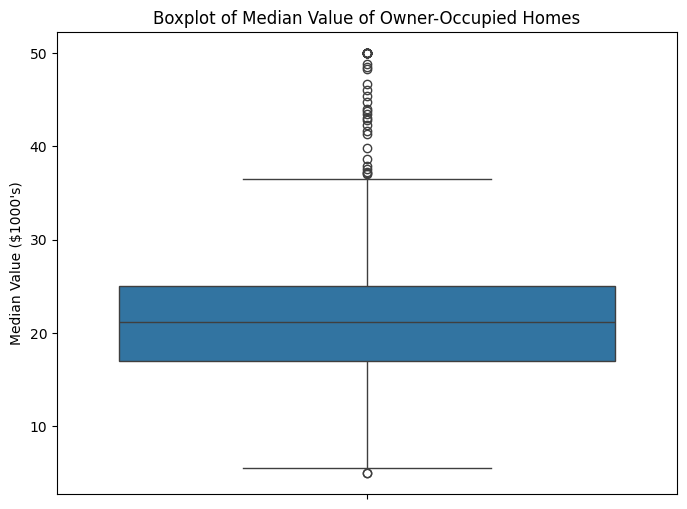

'Explanation: This shows the distribution of home values. We can see the median, quartiles, and potential outliers.'

In [6]:
#For the "Median value of owner-occupied homes" provide a boxplot

pyplot.figure(figsize=(8,6))
sns.boxplot(y='MEDV', data = boston_df)
pyplot.title("Boxplot of Median Value of Owner-Occupied Homes")
pyplot.ylabel("Median Value ($1000's)")
pyplot.show()

'Explanation: This shows the distribution of home values. We can see the median, quartiles, and potential outliers.'


<Figure size 800x600 with 0 Axes>

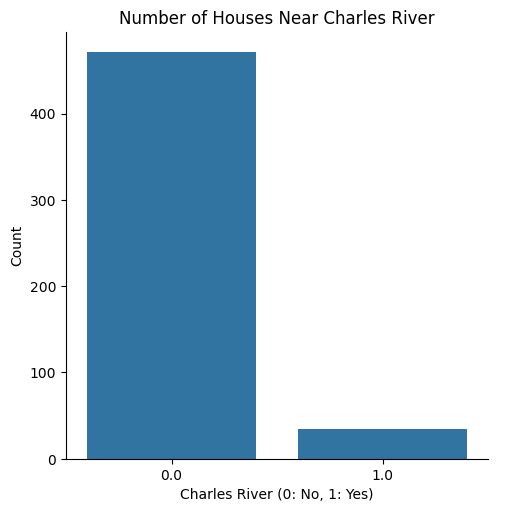

'Explanation: Shows the count of homes near (1) and not near (0) the Charles River.'

In [7]:
#Provide a  bar plot for the Charles river variable

pyplot.figure(figsize=(8,6))
sns.catplot(x='CHAS', kind='count', data = boston_df)
pyplot.title("Number of Houses Near Charles River")
pyplot.xlabel("Charles River (0: No, 1: Yes)")
pyplot.ylabel("Count")
pyplot.show()

'Explanation: Shows the count of homes near (1) and not near (0) the Charles River.'

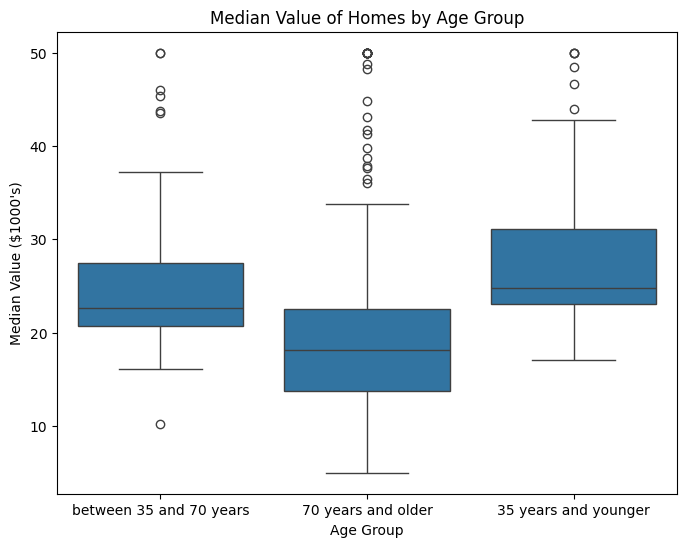

'Explanation: Compares home values across different age groups of properties.'

In [9]:
# Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

pyplot.figure(figsize=(8,6))
sns.boxplot(x="age_group", y="MEDV", data=boston_df)
pyplot.title("Median Value of Homes by Age Group")
pyplot.xlabel("Age Group")
pyplot.ylabel("Median Value ($1000's)")
pyplot.show()

'Explanation: Compares home values across different age groups of properties.'


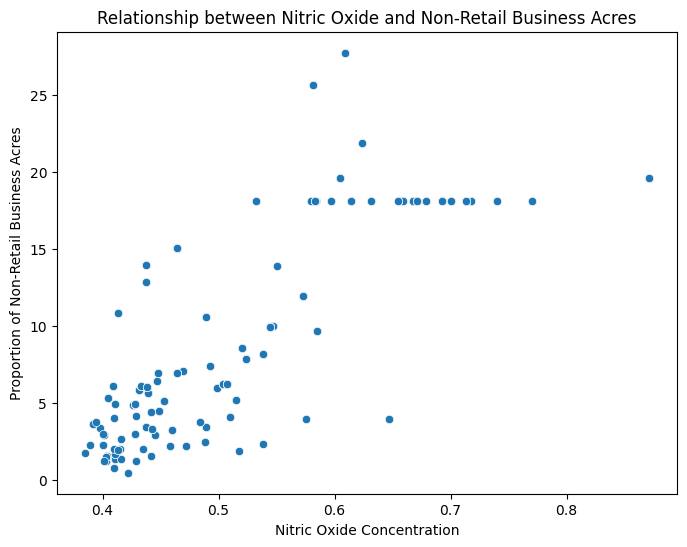

'Explanation: Shows relationship between nitric oxide concentration and industrial areas.'

In [10]:
#Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

pyplot.figure(figsize=(8,6))
sns.scatterplot(x='NOX', y='INDUS',  data=boston_df)
pyplot.title("Relationship between Nitric Oxide and Non-Retail Business Acres")
pyplot.xlabel("Nitric Oxide Concentration")
pyplot.ylabel("Proportion of Non-Retail Business Acres")
pyplot.show()

'Explanation: Shows relationship between nitric oxide concentration and industrial areas.'

<ipython-input-11-d9586358c95a>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(boston_df['PTRATIO'], kde = False)


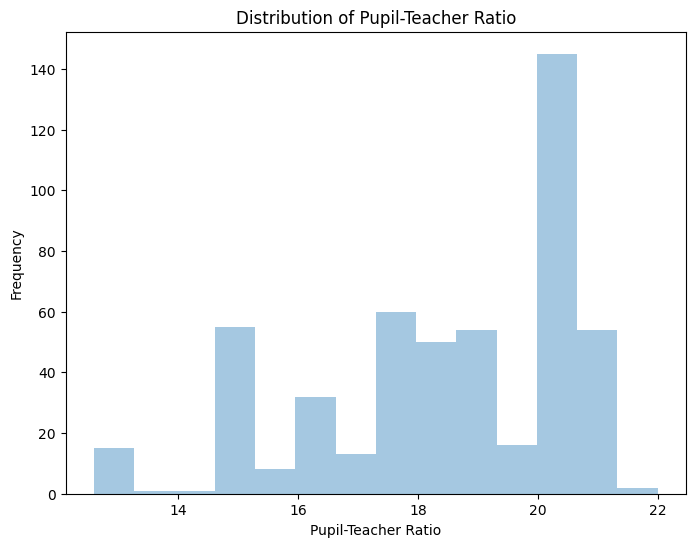

'Explanation: Shows distribution of pupil-teacher ratios across towns.'

In [11]:
#Create a histogram for the pupil to teacher ratio variable

pyplot.figure(figsize=(8,6))
sns.distplot(boston_df['PTRATIO'], kde = False)
pyplot.title("Distribution of Pupil-Teacher Ratio")
pyplot.xlabel("Pupil-Teacher Ratio")
pyplot.ylabel("Frequency")
pyplot.show()

'Explanation: Shows distribution of pupil-teacher ratios across towns.'

In [12]:
#Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

#H0 there is no difference in median value of houses bounded by the Charles river
#H1 there is a difference in median value of houses bounded by the Charles river

print("Null Hypothesis (H0):  no difference in median value of houses bounded by the Charles river")
print("Alternative Hypothesis (H1):  a difference in median value of houses bounded by the Charles river")

scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], center='mean')


Null Hypothesis (H0):  no difference in median value of houses bounded by the Charles river
Alternative Hypothesis (H1):  a difference in median value of houses bounded by the Charles river


LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

Conclusion: Since the p-value is less than 0.05 we can not assume equality of variance

In [13]:
#Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

#H0 the three population means are equal
#H1 at least one of the means differ

print("Null Hypothesis (H0):  the three population means are equal")
print("Alternative Hypothesis (H1): at least one of the means differ")

scipy.stats.levene(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['age_group'] == '70 years and older']['MEDV'], 
                   center='mean')


Null Hypothesis (H0):  the three population means are equal
Alternative Hypothesis (H1): at least one of the means differ


LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [14]:
thirtyfive_lower = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

In [15]:
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


Conclusion: Since the p-value is greater than 0.05, we will fail to reject the null hypothesis as there is no significant evidence that at least one of the means differ

In [16]:
#Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

#H0 both does not correlate
#H1 both correlate

print("Null Hypothesis (H0): both do not correlate")
print("Alternative Hypothesis (H1): both correlater")

scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

Null Hypothesis (H0): both do not correlate
Alternative Hypothesis (H1): both correlater


PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

Conclusion: Since the p-value is less than 0.05, we reject the Null hypothesis and conclude that there exists a relationship between NOX and INDUS.

In [17]:
# What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

#H0 Dis is not correlated with MEDV
#H1 Dis is correlated with MEDV

print("Null Hypothesis (H0): Dis is not correlated with MEDV")
print("Alternative Hypothesis (H1): Dis is correlated with MEDV")

## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

Null Hypothesis (H0): Dis is not correlated with MEDV
Alternative Hypothesis (H1): Dis is correlated with MEDV


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 26 May 2025   Prob (F-statistic):           1.21e-08
Time:                        13:25:24   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Conclusion: Since the p-value less than 0.05, we reject the Null hypothesis and conclude that there exists a relationship between DIS and MEDV.